In [157]:
import numpy as np
import os

import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# to make this notebook's output stable across runs
np.random.seed(42)

BIODATA_PATH="/home/wlos/Biohackaton 2018/newdata/"

import numpy as np
import pandas as pd
import sklearn.linear_model

import pandas as pd

def load_data(path=BIODATA_PATH):
    print("Loading data")
    csv_path = os.path.join(path, "HACK.first500.fixed.withheader.csv")
    return pd.read_csv(csv_path)


In [158]:
data=load_data()

Loading data


In [159]:
data.head


<bound method DataFrame.head of      familyId  sampleId  sex  affected  rs6599770  rs12440100  rs12906138  \
0           3    19Y384  2.0       1.0        6.0         7.0         7.0   
1           4    19Y382  2.0       2.0        6.0         4.0         7.0   
2           5    19Y411  1.0       2.0        6.0         4.0         4.0   
3           6    19Y406  2.0       2.0        3.0         4.0         7.0   
4           7    19Y448  2.0       2.0        3.0         4.0         4.0   
5           8    19Y241  1.0       1.0        1.0         7.0         7.0   
6           9    19Y338  1.0       2.0        3.0         4.0         1.0   
7          10    19Y368  2.0      -9.0        1.0         4.0         4.0   
8          11    19Y394  2.0       1.0        3.0         4.0         7.0   
9          12    19Y386  1.0       1.0        3.0         7.0         7.0   
10         13    19Y418  2.0       2.0        3.0         4.0         1.0   
11         14    19Y444  2.0       2.0      

In [161]:
dataframe = pandas.read_csv("newdata/HACK.first500.fixed.withheader.csv", low_memory=False)

In [162]:
array = dataframe.values
X = array[:,4:]
Y = array[:,2]
Y=Y.astype('int')

In [163]:
X

array([[6.0, 7.0, 7.0, ..., 3.0, 2.0, 9.0],
       [6.0, 4.0, 7.0, ..., 3.0, 12.0, 2.0],
       [6.0, 4.0, 4.0, ..., 3.0, 2.0, 9.0],
       ...,
       [3.0, 4.0, 4.0, ..., 3.0, 2.0, 0.0],
       [6.0, 7.0, 7.0, ..., 3.0, 2.0, 9.0],
       [6.0, 4.0, 4.0, ..., 3.0, 2.0, 0.0]], dtype=object)

CART: 0.826000 (0.069886)


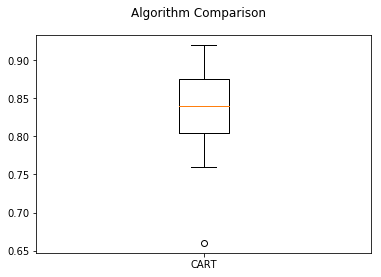

In [165]:
# prepare models
models = []
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=42)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [166]:
from sklearn import svm
clf = svm.SVC()
#clf.fit(X, Y)  

In [168]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
#prediction = clf2.predict(X[0:1])

In [ ]:
list(clf.predict(X[:3]))


In [244]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion="entropy",  max_depth=3, min_samples_leaf=5)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=1, test_size = 0.3)

In [245]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

model.fit(X_train, y_train)

In [246]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8266666666666667

In [247]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted dark hair', 'Predicted light hair'],
    index=['True Dark hair', 'True light hair']
)

,Predicted dark hair,Predicted light hair
True Dark hair,55,17
True light hair,9,69


In [248]:
tree.export_graphviz(model, out_file='tree.dot',feature_names=dataframe.columns.values[4:])
from subprocess import call

call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

0